In [27]:
from PIL import Image # 이미지+워드크라우드용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
fontpath = 'C:/Windows/Fonts/malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=fontpath).get_name()
plt.rc('font', family=font_name)

%matplotlib inline

%config InlineBackend.figure_format = 'retina'


In [28]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("최종.csv")
for i in range(0,len(df['Content'])):
    df['Content'][i] = df['Content'][i].lstrip()
    df['Content'][i] = df['Content'][i].rstrip()

<ipython-input-11-105e35590030>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'][i] = df['Content'][i].lstrip()
<ipython-input-11-105e35590030>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'][i] = df['Content'][i].rstrip()


In [14]:
df.head(2)

,LINK,Title,Content,Date,Species
0,http://news.khan.co.kr/kh_news/khan_art_view.h...,삼성전자 차 부품전장 사업 수장 교체,팀장에 이승욱 부사장 선임LG전자와 경쟁 치열해질 듯 삼성전자가 미래 먹거리인 자동...,20201231,경향
1,http://news.khan.co.kr/kh_news/khan_art_view.h...,25 시민 자율과 자치의 상상력을 발휘폭주하는 과학기술 말머리를 돌려라,기술 민주주의 얼마 전까지도 우리 사회 속 기술 수용은 그리 대중의 관심사가 아니었...,20201231,경향


In [15]:
Okt = Okt()
morphs = []

for sentence in df['Content']:
    morphs.append(Okt.pos(sentence))

In [16]:
noun_list=[] 
for sentence in morphs: 
    for word, tag in sentence: 
        if tag in ['Noun'] and ('이' not in word) and ('것' not in word) and ('등' not in word) and ('수' not in word) and ('전' not in word) and ('그' not in word) and ('왜' not in word) and ('기사' not in word): 
            noun_list.append(word) 
            
count = Counter(noun_list)

words = dict(count.most_common(100)) #상위 100개

print(words)

{'기술': 32320, '지능': 28493, '인공': 26798, '서비스': 19319, '기업': 18394, '말': 18260, '개발': 15571, '통해': 15030, '위': 14817, '사업': 14208, '산업': 12341, '분야': 11731, '및': 11651, '위해': 11640, '한국': 11220, '세계': 11112, '개': 10574, '더': 10376, '미래': 10344, '활용': 10194, '시장': 10046, '투자': 9843, '로봇': 9719, '사람': 9494, '차': 9468, '미국': 9440, '대한': 9328, '제공': 9142, '시스템': 8960, '우리': 8853, '정보': 8714, '혁신': 8664, '국내': 8656, '지원': 8647, '교육': 8623, '인간': 8541, '를': 8361, '때문': 8346, '사회': 8321, '때': 8221, '중': 8206, '정부': 7983, '계획': 7966, '기반': 7923, '의': 7482, '기능': 7457, '관련': 7455, '분석': 7342, '대표': 7268, '올해': 7243, '스마트': 7146, '연구': 6962, '명': 6958, '제품': 6878, '중국': 6864, '진행': 6630, '적용': 6504, '지난해': 6475, '플랫폼': 6449, '센터': 6418, '시대': 6373, '문제': 6343, '최근': 6291, '글로벌': 6253, '고객': 6194, '구글': 6163, '점': 6160, '산업혁명': 6025, '시작': 6007, '단': 6001, '현재': 5865, '가장': 5789, '게임': 5787, '사용': 5781, '또': 5572, '디지털': 5555, '경우': 5546, '생각': 5505, '변화': 5412, '기존': 5409, '내': 5356, '원': 5320, '

https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py

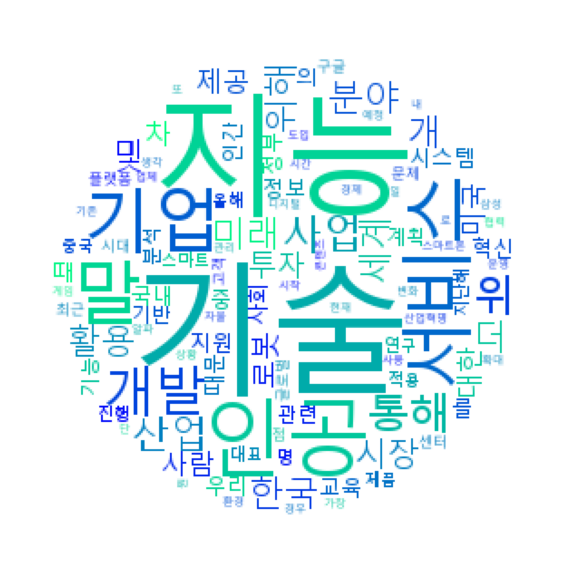

In [39]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


# wc = WordCloud(background_color="white", repeat=True, mask=mask)
# wc.generate(words)

# plt.axis("off")
# plt.imshow(wc, interpolation="bilinear")
# plt.show()

wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      #colormap = "Accent_r",
                      #colormap = "gist_rainbow_r",
                      #colormap = "spring_r",
                      colormap = "winter_r",
                      mask=mask).generate_from_frequencies(words)

fig = plt.figure(figsize=(5, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('1.png')
plt.show()


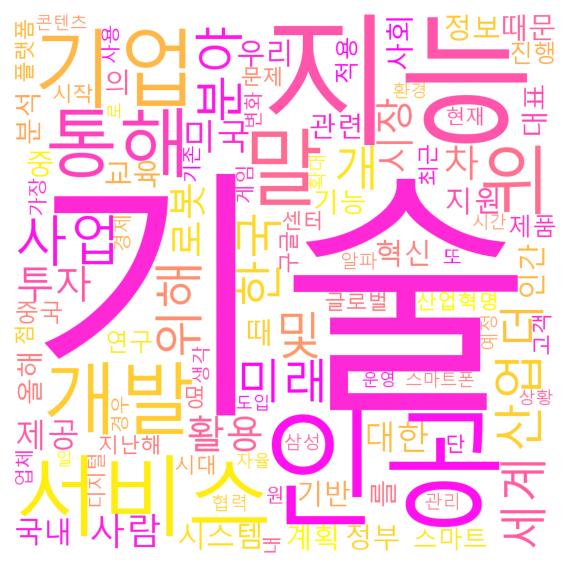

In [40]:
wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      #colormap = "Accent_r",
                      #colormap = "gist_rainbow_r",
                      colormap = "spring_r",
                      #colormap = "winter_r",
                      width=1000, 
                      height=1000).generate_from_frequencies(words)

fig = plt.figure(figsize=(5, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('2.png')
plt.show()